In [2]:
# Librerias
import glob
import numpy as np
import os
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Trabajo Computación avanzada
# Red neuronal multiclase para la clasificación de imagenes
## Información del dataset
Dataset: https://www.kaggle.com/kmader/food41
Contiene un total de .000 imagenes distribuidas en dos conjuntos con un total de 101 categorias:


*   Train: 
*   Test:

## Lectura

In [30]:
train_data = ImageDataGenerator(rescale = 1./255, validation_split=0.2)
test_data = ImageDataGenerator(rescale = 1./255)
bs = 32
train_gen = train_data.flow_from_directory('dataset/TRAIN', class_mode='categorical', batch_size=bs, target_size=(240,320), subset='training')
val_gen = train_data.flow_from_directory('dataset/TRAIN', target_size = (240,320), batch_size=bs, class_mode='categorical', subset='validation')
test_gen = test_data.flow_from_directory('dataset/TEST', class_mode='categorical', batch_size=bs, target_size=(240,320), shuffle=False, )

Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


## Muestra

(32, 240, 320, 3)
(32, 4)
[0. 1. 0. 0.]
Clase :  LYMPHOCYTE


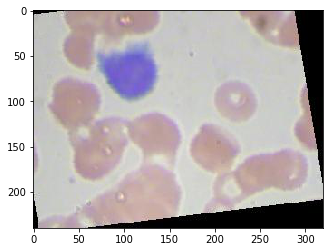

In [51]:
x_b, y_b = val_gen.next()
print(x_b.shape)
print(y_b.shape)
muestra = np.random.choice(bs)
plt.imshow(x_b[muestra,:,:,:])
print(y_b[muestra])
print("Clase : ", list(val_gen.class_indices.keys())[y_b[muestra].argmax()])

## Modelos

Ya que se trata de un dataset con gran cantidad de imagenes, comenzamos con un modelo con varias capas de convolución, muy parecido al primer ejemplo que vimos en teoría.

In [54]:
tf.random.set_seed(1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (240, 320, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 238, 318, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 117, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 58, 78, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 56, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 38, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 136192)           

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 5, steps_per_epoch = train_gen.samples/bs, validation_steps=val_gen.samples/bs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 249.0 steps, validate for 62.15625 steps
Epoch 1/5
227/249 [==========================>...] - ETA: 43s - loss: 1.4785 - accuracy: 0.3515

In [0]:
model.evaluate(test_gen,  steps=test_gen.samples/bs)

  ...
    to  
  ['...']
94/93 [==============================] - 10s 108ms/step - loss: 0.9209 - accuracy: 0.7707


[0.923337493588527, 0.77066666]

Para reducir más aun las dimensiones y aumentar el porcentaje de acierto, añadimos un par de capas más de convolución.

In [37]:
tf.random.set_seed(1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 5, steps_per_epoch = train_gen.samples/bs, validation_steps=val_gen.samples/bs)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 249.0 steps, validate for 62.15625 steps
Epoch 1/5
  1/249 [..............................] - ETA: 4:49

InvalidArgumentError:  Input to reshape is a tensor with 958464 values, but the requested shape requires a multiple of 6272
	 [[node sequential_4/flatten_4/Reshape (defined at <ipython-input-38-666bfdc6ad06>:2) ]] [Op:__inference_distributed_function_2673]

Function call stack:
distributed_function


In [0]:
model.evaluate(test_gen,  steps=test_gen.samples/bs)

  ...
    to  
  ['...']
94/93 [==============================] - 13s 133ms/step - loss: 0.5033 - accuracy: 0.8233


[0.5046325714290142, 0.8233333]

In [0]:
Para aumentar el porcentaje de acierto en test utillizamos muestras de regularización.
En primer lugar una capa Dropout junto con una regularización L2 y aumentamos las épocas

In [0]:
tf.random.set_seed(1)
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 15, steps_per_epoch = train_gen.samples/bs, validation_steps=val_gen.samples/bs)

Epoch 1/15
351/350 [==============================] - 23s 67ms/step - loss: 0.4610 - accuracy: 0.8671 - val_loss: 0.5592 - val_accuracy: 0.8399
Epoch 2/15
351/350 [==============================] - 23s 66ms/step - loss: 0.4288 - accuracy: 0.8732 - val_loss: 0.6941 - val_accuracy: 0.8238
Epoch 3/15
351/350 [==============================] - 24s 67ms/step - loss: 0.4052 - accuracy: 0.8835 - val_loss: 0.5558 - val_accuracy: 0.8367
Epoch 4/15
351/350 [==============================] - 23s 66ms/step - loss: 0.3973 - accuracy: 0.8870 - val_loss: 0.5517 - val_accuracy: 0.8459
Epoch 5/15
351/350 [==============================] - 23s 66ms/step - loss: 0.3707 - accuracy: 0.8947 - val_loss: 0.5879 - val_accuracy: 0.8484
Epoch 6/15
351/350 [==============================] - 23s 66ms/step - loss: 0.3645 - accuracy: 0.9005 - val_loss: 0.5613 - val_accuracy: 0.8302
Epoch 7/15
351/350 [==============================] - 23s 67ms/step - loss: 0.3485 - accuracy: 0.9051 - val_loss: 0.6501 - val_accuracy:

In [0]:
model.evaluate(test_gen,  steps=test_gen.samples/bs)

94/93 [==============================] - 4s 46ms/step - loss: 0.5350 - accuracy: 0.8447


[0.5349522829055786, 0.8446666598320007]

In [0]:
model.add(layers.Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
bs = 32
train_data = ImageDataGenerator(validation_split = 0.2, rotation_range = 15, width_shift_range = 0.1, height_shift_range = 0.1)
train_gen = train_data.flow(X_train, Y_train, shuffle=True, subset='training', batch_size=bs)
val_gen = train_data.flow(X_train, Y_train, shuffle=True, subset='validation', batch_size=bs)
model3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.fit(train_gen, validation_data = val_gen, epochs = 10 )

In [0]:
from tensorflow.keras.applications import VGG16
model_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150,150,3))
model_base.summary()
tf.random.set_seed(1)
model = models.Sequential()
model.add(model_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 10, steps_per_epoch = train_gen.samples/bs, validation_steps=val_gen.samples/bs, verbose=True)
model.evaluate(test_gen,  steps=test_gen.samples/bs, workers=1, use_multiprocessing=False)
model3.evaluate(X_test, Y_test)

In [0]:
from tensorflow.keras.applications import VGG16

model_base = VGG19(weights = 'imagenet', include_top = False, input_shape = (150,150,3))
model_base.summary()

for capa in model_base.layers:
  capa.trainable = False

tf.random.set_seed(1)
model = models.Sequential()
model.add(model_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])
history = model.fit(train_gen, validation_data = val_gen, epochs = 10, steps_per_epoch = train_gen.samples/bs, validation_steps=val_gen.samples/bs, verbose=True)

model.evaluate(test_gen,  steps=test_gen.samples/bs, workers=1, use_multiprocessing=False)